<a href="https://colab.research.google.com/github/sridatascience/inkersassignments/blob/master/PytorchNetworkSession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U numpy
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
import torch.nn as nn

from __future__ import print_function  #import appropriate libraries 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.4)


In [2]:
train_set = torchvision.datasets.EMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,split='byclass'  # ByClass  has 814,255 characters and 62 unbalanced classes, train set has 60,000 characters
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Extracting ./data/EMNIST/raw/emnist.zip to ./data/EMNIST/raw
Processing byclass


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [3]:
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=100)

In [4]:
len(train_set) # train set has 6,97,932 images

697932

In [5]:
len(train_loader)

6980

In [6]:
train_set.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([35, 36,  6,  ...,  5, 11, 22])

In [7]:
train_set.train_labels.bincount()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([34585, 38374, 34203, 35143, 33535, 31416, 34232, 35754, 33946, 33847,
         6407,  3878, 10094,  4562,  4934,  9182,  2517,  3152, 11946,  3762,
         2468,  5076,  9002,  8237, 24983,  8347,  2605,  5073, 20764,  9820,
        12602,  4637,  4695,  2771,  4743,  2701, 10033,  5159,  2854, 10177,
        24631,  2561,  3687,  8738,  2725,  1896,  2491, 15318,  2645, 11418,
         2749,  2448,  2994, 14105,  2699, 18262,  2830,  2910,  2697,  2822,
         2365,  2725])

In [9]:
sample = next(iter(train_set))
image = sample[0]
label = sample[1]

In [10]:
image.shape, label

(torch.Size([1, 28, 28]), 35)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

label: 35


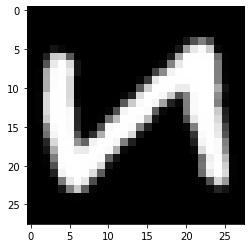

In [12]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [13]:
n_batch = next(iter(train_loader))
len(n_batch), type(n_batch)

(2, list)

In [14]:
images = n_batch[0]
labels = n_batch[1]
images.shape, labels.shape
# batch size is 100 , 1 indicating single color- gray scale image, 28 is the height and next 28 is the width

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

labels: tensor([35, 36,  6,  3, 22, 38,  5,  9, 47,  4,  7, 56, 29, 40, 55,  6, 55, 57,
        43,  6,  3,  7, 32,  3, 40,  9, 22, 15, 26,  2,  5,  2, 15, 40, 28,  5,
        56,  8, 22, 49, 12,  9,  1, 59,  1,  5, 47, 49,  6, 18,  1, 41, 49,  9,
         6,  2,  9,  9,  2,  0, 46, 55,  1, 55, 23,  5, 51, 24,  7,  1, 31,  9,
        24,  2,  1, 45,  2, 15,  2,  4, 39,  8,  4,  1, 39,  9,  3, 43, 28, 39,
         8, 38,  7,  7, 38,  2,  4, 49,  4,  4])


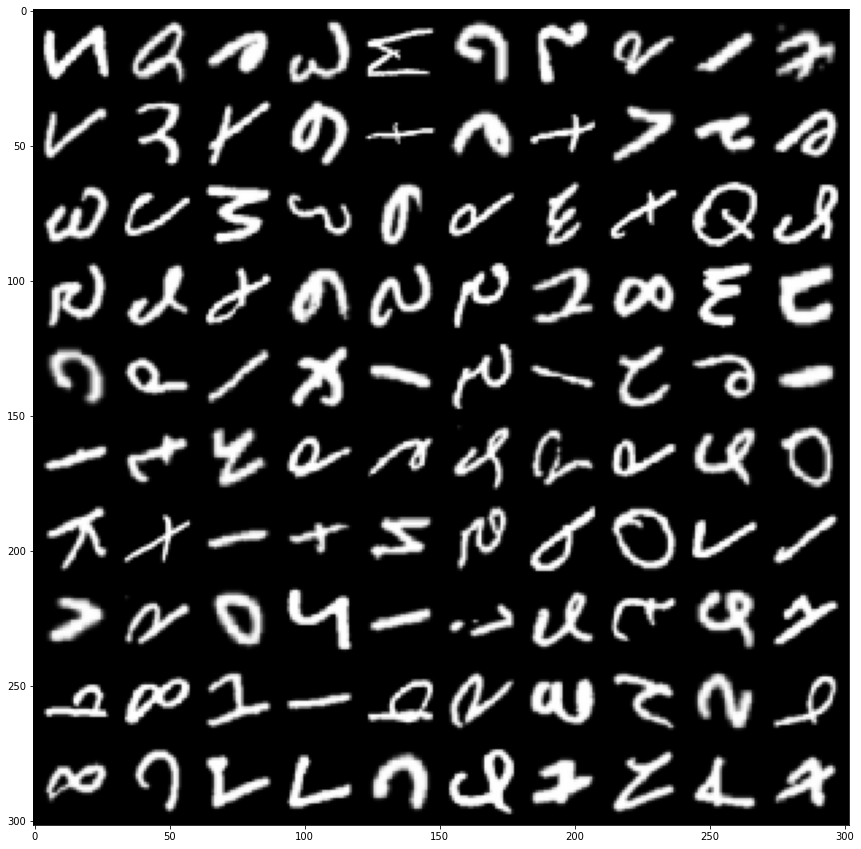

In [15]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [16]:
import torch.nn as nn

In [17]:
class Network(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3) # i/p 28x28x1  10x3x3x1 >> o/p 26x26x10 RF 1
    self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3) # i/p 26x26x10  10x3x3x10 >>o/p 24x24x10 RF 3
    self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3) # i/p 24x24x10  10x3x3x10x20 >>o/p 22x22x20 RF 5
    self.pool1 = nn.MaxPool2d(2, 2)  #i/p 22x22x20 >> o/p 11x11x20 RF 10
    self.conv4 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3) # i/p 11x11x20  10x3x3x10x20x20  >>o/p 9x9x20 RF 12
    self.conv5 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3) # i/p 9x9x20 >> 10x3x3x10x20x20x30 >>o/p 7x7x30 RF 14    
    self.pool2 = nn.MaxPool2d(2, 2)  # ip 7x7x30  >> o/p 3x3x30 RF 28
    self.conv6 = nn.Conv2d(in_channels=30, out_channels=62  , kernel_size=3) # i/p 7x7x30 >>  10x3x3x10x20x20x30x62    >> o/p 5x5x62  RF 30
    # self.gpool3 = nn.AvgPool2d(2,2) # added recently
     

  def forward(self, x):
    x = self.pool1(F.relu(self.conv3(F.relu(self.conv2(F.relu(self.conv1(x)))))))   # relu layer drops all negative values and propagates positive values as it is
    x = self.pool2(F.relu(self.conv5(F.relu(self.conv4(x)))))
    x = self.conv6(x)  
    # x = self.gpool3(x)   # added recently
    x = x.view(-1, 62)
    return F.log_softmax(x) 

In [18]:
!pip install torchsummary    # Run the shell command from the script , it installs torchsummary package from shell
from torchsummary import summary
use_cuda = torch.cuda.is_available() # checks for the availability of GPU, if available returns True else False
# print(use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")  # Device stores "cuda" if GPU is available or 'cpu' if GPU is not available
print(device)
model = Network().to(device)                # Moves the model to GPU
summary(model, input_size=(1, 28, 28))  # Input Image size is 28x28X1, 1 here specifies only 1 channel of the input i.e, gray scale image
                                      

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 10, 24, 24]             910
            Conv2d-3           [-1, 20, 22, 22]           1,820
         MaxPool2d-4           [-1, 20, 11, 11]               0
            Conv2d-5             [-1, 20, 9, 9]           3,620
            Conv2d-6             [-1, 30, 7, 7]           5,430
         MaxPool2d-7             [-1, 30, 3, 3]               0
            Conv2d-8             [-1, 62, 1, 1]          16,802
Total params: 28,682
Trainable params: 28,682
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.21
Params size (MB): 0.11
Estimated Total Size (MB): 0.33
----------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [19]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv6): Conv2d(30, 62, kernel_size=(3, 3), stride=(1, 1))
)

In [20]:
for param in network.parameters():
  print(param.shape)

torch.Size([10, 1, 3, 3])
torch.Size([10])
torch.Size([10, 10, 3, 3])
torch.Size([10])
torch.Size([20, 10, 3, 3])
torch.Size([20])
torch.Size([20, 20, 3, 3])
torch.Size([20])
torch.Size([30, 20, 3, 3])
torch.Size([30])
torch.Size([62, 30, 3, 3])
torch.Size([62])


In [21]:
network(images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[-4.1544, -4.1116, -4.1100,  ..., -4.1950, -4.1585, -4.1823],
        [-4.1558, -4.1042, -4.1100,  ..., -4.1917, -4.1623, -4.1847],
        [-4.1557, -4.1075, -4.1101,  ..., -4.1952, -4.1614, -4.1840],
        ...,
        [-4.1542, -4.1108, -4.1118,  ..., -4.1943, -4.1605, -4.1827],
        [-4.1503, -4.1125, -4.1154,  ..., -4.1919, -4.1644, -4.1852],
        [-4.1555, -4.1076, -4.1134,  ..., -4.1998, -4.1611, -4.1880]],
       grad_fn=<LogSoftmaxBackward>)

In [24]:


torch.manual_seed(1)
batch_size = 100

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.EMNIST('../data', train=True, download=True,split='byclass',
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.EMNIST('../data', train=False, split='byclass', transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/EMNIST/raw/emnist.zip to ../data/EMNIST/raw
Processing byclass
Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [ ]:
# from tqdm import tqdm
# def train(model, device, train_loader, optimizer, epoch):
#     model.train()
#     pbar = tqdm(train_loader)
#     for batch_idx, (data, target) in enumerate(pbar):
#         data, target = data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(data)
#         loss = F.nll_loss(output, target)
#         loss.backward()
#         optimizer.step()
#         pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


# def test(model, device, test_loader):
#     model.eval()
#     test_loss = 0
#     correct = 0
#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
#             pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     test_loss /= len(test_loader.dataset)

#     print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))

In [25]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    test_acc.append(100. * correct / len(test_loader.dataset))

In [26]:

model = Network().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 21):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/6980 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.4618001878261566 batch_id=6979 Accuracy=79.72: 100%|██████████| 6980/6980 [03:11<00:00, 36.46it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.4695, Accuracy: 97421/116323 (84%)



loss=0.5340748429298401 batch_id=6979 Accuracy=84.27: 100%|██████████| 6980/6980 [03:08<00:00, 36.94it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.4284, Accuracy: 98592/116323 (85%)



loss=0.629635214805603 batch_id=6979 Accuracy=85.04: 100%|██████████| 6980/6980 [03:09<00:00, 36.89it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.4084, Accuracy: 99282/116323 (85%)



loss=0.5166641473770142 batch_id=6979 Accuracy=85.43: 100%|██████████| 6980/6980 [03:12<00:00, 36.25it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.4090, Accuracy: 99073/116323 (85%)



loss=0.4036283791065216 batch_id=6979 Accuracy=85.61: 100%|██████████| 6980/6980 [03:12<00:00, 36.33it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3952, Accuracy: 99287/116323 (85%)



loss=0.21787497401237488 batch_id=6979 Accuracy=85.83: 100%|██████████| 6980/6980 [03:11<00:00, 36.46it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3989, Accuracy: 99670/116323 (86%)



loss=0.3176555633544922 batch_id=6979 Accuracy=85.93: 100%|██████████| 6980/6980 [03:10<00:00, 36.63it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.4001, Accuracy: 99356/116323 (85%)



loss=0.16358794271945953 batch_id=6979 Accuracy=86.06: 100%|██████████| 6980/6980 [03:10<00:00, 36.65it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3868, Accuracy: 99874/116323 (86%)



loss=0.4317134618759155 batch_id=6979 Accuracy=86.16: 100%|██████████| 6980/6980 [03:10<00:00, 36.71it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3849, Accuracy: 99891/116323 (86%)



loss=0.4793258309364319 batch_id=6979 Accuracy=86.25: 100%|██████████| 6980/6980 [03:09<00:00, 36.85it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3835, Accuracy: 100129/116323 (86%)



loss=0.3894571363925934 batch_id=6979 Accuracy=86.24: 100%|██████████| 6980/6980 [03:09<00:00, 36.87it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3885, Accuracy: 99578/116323 (86%)



loss=0.4679749011993408 batch_id=6979 Accuracy=86.34: 100%|██████████| 6980/6980 [03:10<00:00, 36.73it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3817, Accuracy: 100114/116323 (86%)



loss=0.4267638325691223 batch_id=6979 Accuracy=86.38: 100%|██████████| 6980/6980 [03:03<00:00, 38.04it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3857, Accuracy: 99864/116323 (86%)



loss=0.3955953121185303 batch_id=6979 Accuracy=86.42: 100%|██████████| 6980/6980 [03:03<00:00, 38.02it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3793, Accuracy: 100310/116323 (86%)



loss=0.5290695428848267 batch_id=6979 Accuracy=86.46: 100%|██████████| 6980/6980 [03:04<00:00, 37.88it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3880, Accuracy: 99801/116323 (86%)



loss=0.2727576494216919 batch_id=6979 Accuracy=86.51: 100%|██████████| 6980/6980 [03:06<00:00, 37.40it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3842, Accuracy: 100140/116323 (86%)



loss=0.4139802157878876 batch_id=6979 Accuracy=86.51: 100%|██████████| 6980/6980 [03:06<00:00, 37.33it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3801, Accuracy: 100057/116323 (86%)



loss=0.30963897705078125 batch_id=6979 Accuracy=86.50: 100%|██████████| 6980/6980 [03:07<00:00, 37.30it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3863, Accuracy: 99987/116323 (86%)



loss=0.5240029692649841 batch_id=6979 Accuracy=86.55: 100%|██████████| 6980/6980 [03:06<00:00, 37.51it/s]
  0%|          | 0/6980 [00:00<?, ?it/s]


Test set: Average loss: 0.3771, Accuracy: 100476/116323 (86%)



loss=0.5547057390213013 batch_id=6979 Accuracy=86.59: 100%|██████████| 6980/6980 [03:06<00:00, 37.48it/s]



Test set: Average loss: 0.3791, Accuracy: 100113/116323 (86%)

